In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.regression import  PolinomicRegression
from allison.utils.functions.loss import mean_squared_error
from allison.utils.metrics import r2_score
from allison.utils.data import train_test_split

In [34]:
n = 1000
x=np.linspace(2,10,n)
y=x**2 + x+ 5*np.sin(x) + 3*np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,13.865474
1,2.008008,12.884698
2,2.016016,8.422900
3,2.024024,17.917434
4,2.032032,5.327973


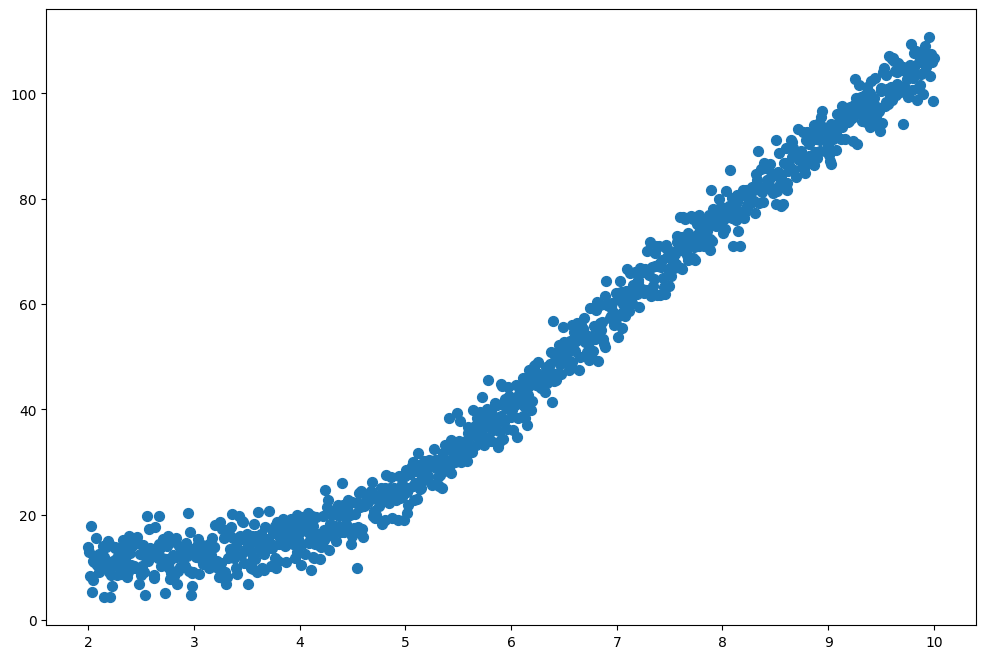

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [36]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [37]:
model=PolinomicRegression(loss_function=mean_squared_error,
                      metric=r2_score,
                      lr = 0.0005,
                      n_grade=2)

model.train(X_train, y_train,n_iters=10, history_train=True)

Iter:	1	==================================================>	 mean_squared_error: 541.271% 	 r2_score: -32.33% 

Iter:	2	==================================================>	 mean_squared_error: 396.526% 	 r2_score: 79.40% 

Iter:	3	==================================================>	 mean_squared_error: 189.615% 	 r2_score: 71.34% 

Iter:	4	==================================================>	 mean_squared_error: 161.077% 	 r2_score: 89.76% 

Iter:	5	==================================================>	 mean_squared_error: 72.602% 	 r2_score: 91.34% 

Iter:	6	==================================================>	 mean_squared_error: 75.482% 	 r2_score: 94.54% 

Iter:	7	==================================================>	 mean_squared_error: 34.960% 	 r2_score: 96.33% 

Iter:	8	==================================================>	 mean_squared_error: 43.492% 	 r2_score: 96.59% 

Iter:	9	==================================================>	 mean_squared_error: 23.645% 	 r2_score: 97.69% 

Iter:

Text(0.5, 1.0, 'Polinomic Regression on Test Data(Accuracy:97.62%)')

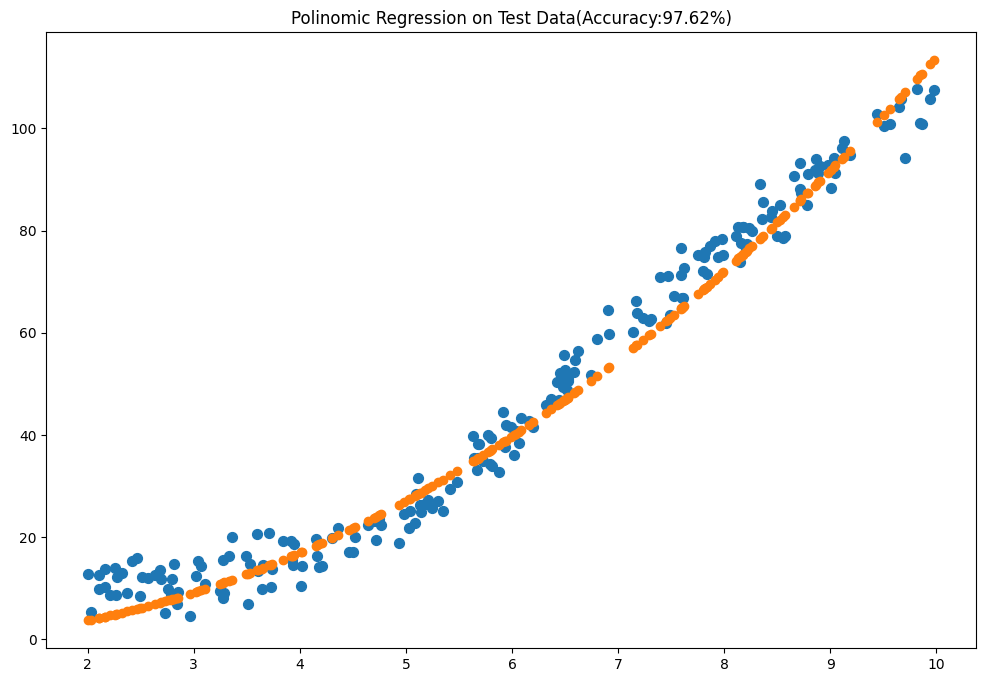

In [38]:
y_pred = model.predict(X_test)
r2 = model.metric(y_test, y_pred)
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.scatter(X_test,y_pred)
plt.title(f'Polinomic Regression on Test Data(Accuracy:{r2*100:.2f}%)')